In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [345]:
import random
random.seed(1)
base_X = 25
base_Y = -100
ETx = 50*0.000000001
ERc = ETx
epsilon_amp = 10*0.000000000001
num_clusters = 5
num_nodes = 100
energy = 0.5
packet_bit = 2000
num_rounds = 4000
aggr = 5*0.000000001
aggr_rate = 0.5

In [346]:
class Cluster:
    def __init__(self):
        self.nodes = []
        self.head = None
        self.bits = 0
        
    def add(self, node):
        self.nodes.append(node)
        
    def is_head(self, node):
        return node == self.head
    
    def dis(self, node):
        return distance(node.X, self.head.X, node.Y, self.head.Y)

In [347]:
def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

In [348]:
import random

class Node:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.energy = energy
        self.die = False
        self.cluster = clusters[random.randint(0,num_clusters - 1)]
        #self.in_cluster(self.cluster)
    
    def in_cluster(self):
        if len(self.cluster.nodes) == 0:
            self.cluster.head = self
            self.cluster.add(self)
        else:
            self.cluster.add(self)
    
    def send(self):
        if self.cluster.is_head(self):
            if self.cluster.bits == 0:
                transmission = ETx * packet_bit
                amplification = epsilon_amp * packet_bit * distance(self.X, base_X, self.Y, base_Y)
                if self.energy < transmission + amplification:
                    self.die = True
                else:
                    self.energy -= (transmission + amplification)
            else:
                transmission = ETx * aggr_rate * (packet_bit + self.cluster.bits)
                amplification = epsilon_amp * aggr_rate * (packet_bit + self.cluster.bits) * distance(self.X, base_X, self.Y, base_Y)
                if self.energy < transmission + amplification + aggr:
                    self.die = True
                else:
                    self.energy -= (transmission + amplification + aggr)
        else:
            if self.cluster.head.die:
                self.die = True
                return
            transmission = ETx * packet_bit
            amplification = epsilon_amp * packet_bit * self.cluster.dis(self)
            if self.energy < transmission + amplification:
                self.die = True
            else:
                self.energy -= (transmission + amplification)
            receive = ERc * packet_bit
            self.cluster.head.energy -= receive
            self.cluster.bits += packet_bit

In [349]:
Xs = uniform.rvs(loc=0, scale=50, size=num_nodes)
Ys = uniform.rvs(loc=0, scale=50, size=num_nodes)

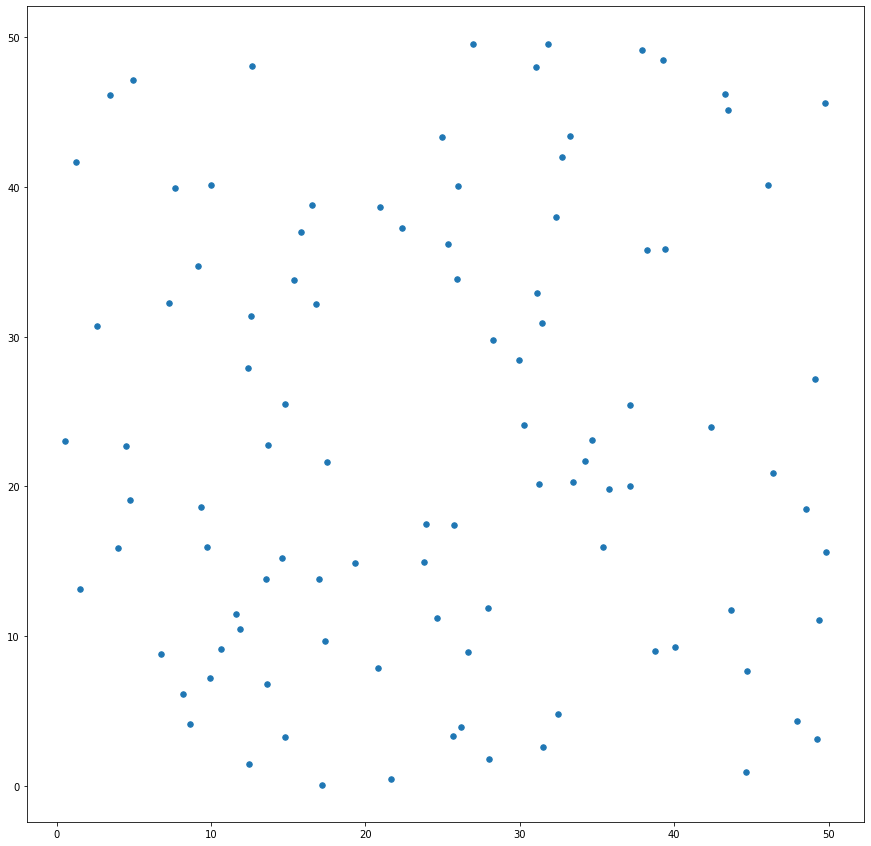

In [350]:
plt.figure(figsize=(15, 15))
plt.scatter(Xs, Ys, s = 30)

In [351]:
Nodes = [None for i in range(num_nodes)]
clusters = [Cluster() for i in range(num_clusters)]

for i in range(num_nodes):
    Nodes[i] = Node(Xs[i], Ys[i])
    Nodes[i].in_cluster()

dead = []
for i in range(101):
    print(Nodes[90].energy)
    for j in range(num_nodes):
        if j not in dead:
            Nodes[j].send()
            if Nodes[j].die:
                dead.append(j)
    if i%100 == 0:
        print(i, len(dead))

0.5
0 0
0.499890371982909
0.49978074396581795
0.49967111594872693
0.4995614879316359
0.4994518599145449
0.49934223189745386
0.49923260388036284
0.4991229758632718
0.4990133478461808
0.49890371982908976
0.49879409181199874
0.4986844637949077
0.4985748357778167
0.49846520776072567
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465
0.49835557974363465


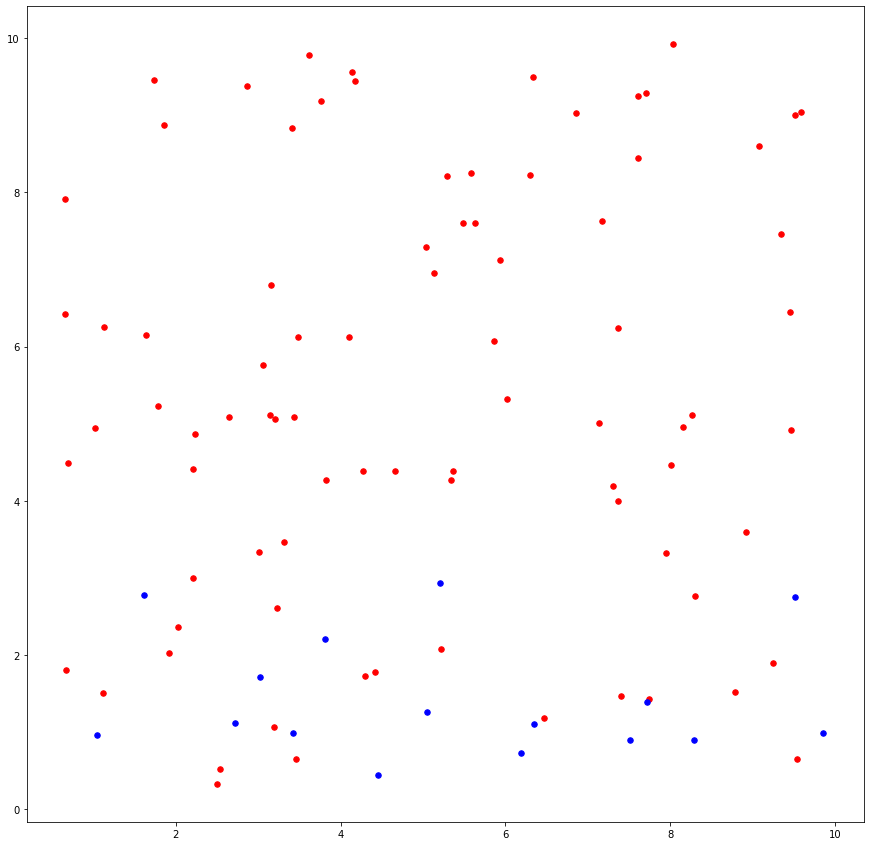

In [311]:
plt.figure(figsize=(15, 15))
dead_X = []
dead_Y = []
undead_X = []
undead_Y = []
for i in range(num_nodes):
    if i in dead:
        dead_X.append(Xs[i])
        dead_Y.append(Ys[i])
    else:
        undead_X.append(Xs[i])
        undead_Y.append(Ys[i])
plt.scatter(dead_X, dead_Y, s = 30, color = 'red')
plt.scatter(undead_X, undead_Y, s = 30, color = 'blue')